# url: https://qiita.com/maskot1977/items/4db7976a987a057ad3ba

# 階層的クラスタリングと、任意の数のクラスタへの分割

まずはサンプルデータの取得から

In [1]:
import seaborn as sns
import pandas as pd
# データロード
df = sns.load_dataset('iris')

# 学習データとテストデータ作成
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


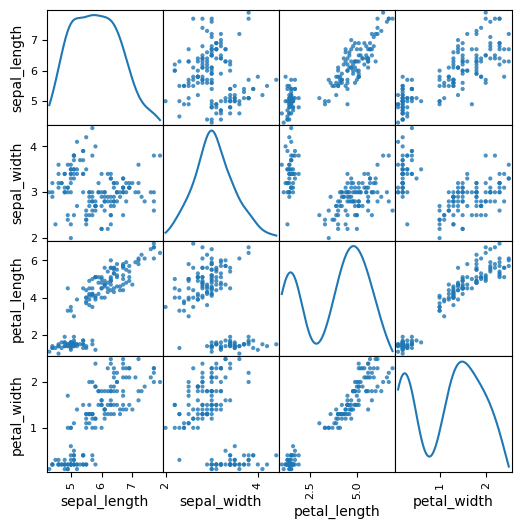

In [2]:
# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix  # 修正: pandas.plotting モジュールを使用する

scatter_matrix(df[df.columns[0:4]], figsize=(6,6), alpha=0.8, diagonal='kde')   #全体像を眺める
plt.show()

さていよいよ階層的クラスタリングの実行です。

階層的クラスタリングを実行するにあたって検討すべき事項は３つ。

    「特徴量の定義」
    「距離の定義」(metric)
    「リンケージ手法」(method)

ここでは、特徴量の定義は既に済んでいる（　df[df.columns[0:4]　）ものとし、距離の定義とリンケージ手法の選択を行って階層的クラスタリングを実行します。

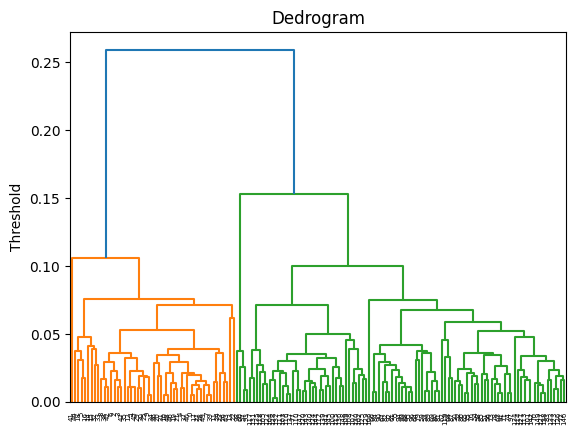

In [3]:
# metric は色々あるので、ケースバイケースでどれかひとつ好きなものを選ぶ。
# method も色々あるので、ケースバイケースでどれかひとつ好きなものを選ぶ。
from scipy.cluster.hierarchy import linkage, dendrogram
result1 = linkage(df.iloc[:, 0:4],
                  metric = 'braycurtis',
                  #metric = 'canberra',
                  #metric = 'chebyshev',
                  #metric = 'cityblock',
                  #metric = 'correlation',
                  #metric = 'cosine',
                  #metric = 'euclidean',
                  #metric = 'hamming',
                  #metric = 'jaccard',
                  #method= 'single')
                  method = 'average')
                  #method= 'complete')
                  #method='weighted')
dendrogram(result1)
plt.title("Dedrogram")
plt.ylabel("Threshold")
plt.show()

# とりあえずこれで、デンドログラム（樹形図）は描けました。

## クラスタを得る

Threshold （閾値）を変えることでクラスタの数は変わります。どのくらいの閾値が適切か、どのくらいのクラスタ数が適切か、データの性質を理解した上でケースバイケースで検討しなければいけません。適切な閾値、あるいは適切なクラスタ数でクラスタを得る方法を作りましょう。

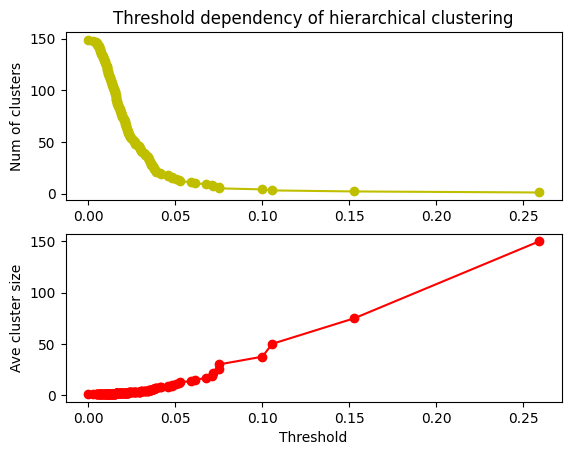

In [4]:
import numpy as np
import matplotlib.pyplot as plt

n_clusters = len(df)
n_samples = len(df)
df1 = pd.DataFrame(result1)
x1 = []
y1 = []
x2 = []
y2 = []

for i in df1.index:
    n1 = int(df1.loc[i, 0])  # 修正: 列名を指定してアクセス
    n2 = int(df1.loc[i, 1])  # 修正: 列名を指定してアクセス
    val = df1.loc[i, 2]      # 修正: 列名を指定してアクセス
    n_clusters -= 1
    x1.append(val)
    x2.append(val)
    y1.append(n_clusters)
    y2.append(float(n_samples) / float(n_clusters))

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'yo-')
plt.title('Threshold dependency of hierarchical clustering')
plt.ylabel('Num of clusters')
plt.subplot(2, 1, 2)
plt.plot(x2, y2, 'ro-')
plt.xlabel('Threshold')
plt.ylabel('Ave cluster size')
plt.show()


In [5]:
# 指定した thoreshold でクラスタを得る関数を作る
def get_cluster_by_threshold(result, threshold):
    output_clusters = []
    output_cluster_ids = []
    x_result, y_result = result.shape
    n_clusters = x_result + 1
    cluster_id = x_result + 1
    father_of = {}
    df1 = pd.DataFrame(result)
    x1 = []
    y1 = []
    x2 = []
    y2 = []
    for i in df1.index:
        n1 = int(df1.loc[i, 0])
        n2 = int(df1.loc[i, 1])
        val = df1.loc[i, 2]
        n_clusters -= 1
        if val < threshold:
            father_of[n1] = cluster_id
            father_of[n2] = cluster_id

        cluster_id += 1

    cluster_dict = {}
    for n in range(x_result + 1):
        if n not in father_of:
            output_clusters.append([n])
            continue

        n2 = n
        m = False
        while n2 in father_of:
            m = father_of[n2]
            n2 = m

        if m not in cluster_dict:
            cluster_dict[m] = []
        cluster_dict[m].append(n)

    output_clusters += cluster_dict.values()

    output_cluster_id = 0
    output_cluster_ids = [0] * (x_result + 1)
    for cluster in sorted(output_clusters):
        for i in cluster:
            output_cluster_ids[i] = output_cluster_id
        output_cluster_id += 1

    return output_cluster_ids

In [6]:
# 指定した thoreshold でクラスタを得る関数を使う。
get_cluster_by_threshold(result1, 0.05)

[0,
 1,
 1,
 1,
 0,
 2,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 3,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 4,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 2,
 2,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 5,
 1,
 0,
 2,
 1,
 0,
 1,
 0,
 0,
 6,
 6,
 6,
 7,
 6,
 7,
 6,
 8,
 6,
 7,
 8,
 7,
 9,
 6,
 7,
 6,
 7,
 7,
 9,
 7,
 10,
 6,
 10,
 6,
 6,
 6,
 6,
 11,
 6,
 7,
 7,
 7,
 7,
 10,
 7,
 6,
 6,
 9,
 7,
 7,
 7,
 6,
 7,
 8,
 7,
 7,
 7,
 6,
 8,
 7,
 11,
 10,
 12,
 11,
 11,
 13,
 14,
 12,
 12,
 12,
 11,
 11,
 11,
 10,
 10,
 11,
 11,
 13,
 13,
 9,
 11,
 10,
 13,
 10,
 11,
 12,
 10,
 10,
 11,
 12,
 12,
 13,
 11,
 10,
 10,
 13,
 11,
 11,
 10,
 11,
 11,
 11,
 10,
 11,
 11,
 11,
 10,
 11,
 11,
 10]

In [7]:
# 指定したクラスタ数でクラスタを得る関数を作る。
def get_cluster_by_number(result, number):
    output_clusters = []
    x_result, y_result = result.shape
    n_clusters = x_result + 1
    cluster_id = x_result + 1
    father_of = {}
    df1 = pd.DataFrame(result)
    x1 = []
    y1 = []
    x2 = []
    y2 = []
    for i in df1.index:
        n1 = int(df1.loc[i, 0])
        n2 = int(df1.loc[i, 1])
        val = df1.loc[i, 2]

        n_clusters -= 1
        if n_clusters >= number:
            father_of[n1] = cluster_id
            father_of[n2] = cluster_id

        cluster_id += 1

    cluster_dict = {}
    for n in range(x_result + 1):
        if n not in father_of:
            output_clusters.append([n])
            continue

        n2 = n
        m = False
        while n2 in father_of:
            m = father_of[n2]
            n2 = m

        if m not in cluster_dict:
            cluster_dict[m] = []
        cluster_dict[m].append(n)

    output_clusters += cluster_dict.values()

    output_cluster_id = 0
    output_cluster_ids = [0] * (x_result + 1)
    for cluster in sorted(output_clusters):
        for i in cluster:
            output_cluster_ids[i] = output_cluster_id
        output_cluster_id += 1

    return output_cluster_ids

In [8]:
# 指定したクラスタ数でクラスタを得る関数を使う。
get_cluster_by_number(result1, 5)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 4,
 2,
 4,
 4,
 4,
 4,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 2,
 2,
 4,
 4,
 4,
 4,
 2,
 4,
 2,
 4,
 2,
 4,
 4,
 2,
 2,
 4,
 4,
 4,
 4,
 4,
 2,
 2,
 4,
 4,
 4,
 2,
 4,
 4,
 4,
 2,
 4,
 4,
 4,
 2,
 4,
 4,
 2]

以上で、階層的クラスタリングができるようになりました。でもこれだけでは、しっくり来る結果が得られたのかどうかよく分かりませんので、図示してみましょう。



## クラスタリング結果のマッピング
クラスタリング結果を Scatter Matrix 上にマッピングします。
色は自分で決めることもできます（総合実験４日目 参照）が、色の数が増えると面倒なので次のように自動で決めることもできます。 cmapのオプション を設定すればいろんな色の組み合わせで表現できます。

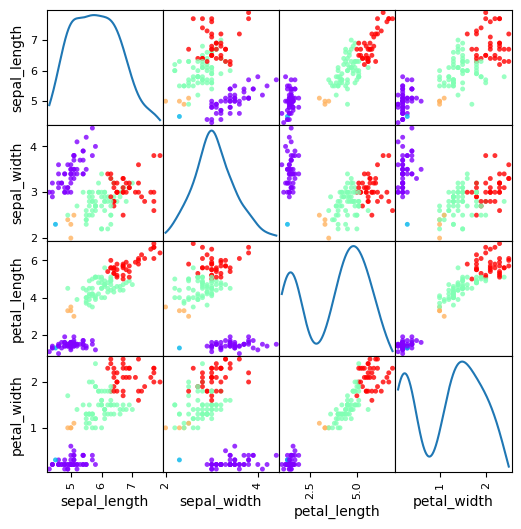

In [9]:
# Scatter Matrix に、クラスタリング結果をマッピング
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
from pandas.plotting import scatter_matrix  # 修正: pandas.plotting モジュールを使用する

# クラスタリング結果を取得
cluster_ids = get_cluster_by_number(result1, 5)

scatter_matrix(df[df.columns[0:4]], figsize=(6, 6), alpha=0.8, diagonal='kde',
               c=cluster_ids, cmap=cm.rainbow, s=50)

plt.show()

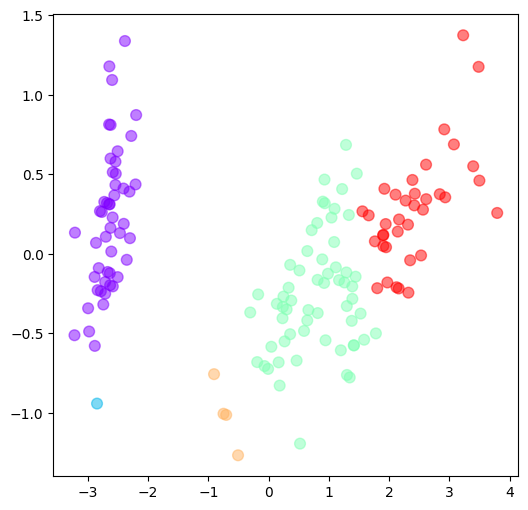

In [10]:
# クラスタリング結果を、主成分分析のプロット上にマッピングします。
# 主成分分析のプロットに、クラスタリング結果をマッピング
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df[df.columns[0:4]])
feature = pca.transform(df[df.columns[0:4]])

plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], c = get_cluster_by_number(result1, 5), s = 60, alpha = 0.5, cmap=plt.cm.rainbow)
plt.show()

## もうちょっと詳しく、流れを理解したい
以上で、階層的クラスタリングと、クラスタリング結果のマッピングまでできるようになりました。ここから先は、やらなくても良いと言えばやらなくても良いところです。階層的クラスタリングをするときに、何が起こっているのか少しだけ詳しく見ながら進めると次のようになります。

### 距離行列生成

In [11]:
# 距離といっても色んな距離があるので、どれか選ぶ。
import scipy.spatial.distance as distance
n_samples = len(df)
dMatrix = np.zeros([n_samples, n_samples])

for i in range(n_samples):
    for j in range(n_samples):
        dMatrix[i, j] = distance.braycurtis(df.iloc[i, 0:4], df.iloc[j, 0:4])  # 列のラベルを使用
        #dMatrix[i, j] = distance.canberra(df.iloc[i, 0:4], df.iloc[j, 0:4])  # 他の距離メトリクスも同様に修正
        #dMatrix[i, j] = distance.canberra(df.iloc[i, 0:4], df.iloc[j, 0:4]), 1:5]) # canberra　距離
        #dMatrix[i, j] = distance.chebyshev(df.iloc[i, 0:4], df.iloc[j, 0:4])  # chebyshev　距離
        #dMatrix[i, j] = distance.cityblock(df.iloc[i, 0:4], df.iloc[j, 0:4])  # cityblock　距離
        #dMatrix[i, j] = distance.correlation(df.iloc[i, 0:4], df.iloc[j, 0:4])  # correlation　距離
        #dMatrix[i, j] = distance.cosine(df.iloc[i, 0:4], df.iloc[j, 0:4])  # cosine　距離
        #dMatrix[i, j] = distance.euclidean(df.iloc[i, 0:4], df.iloc[j, 0:4])  # euclidean　距離
        #dMatrix[i, j] = distance.hamming(df.iloc[i, 0:4], df.iloc[j, 0:4])  # hamming　距離
        #dMatrix[i, j] = distance.jaccard(df.iloc[i, 0:4], df.iloc[j, 0:4])  # jaccard　距離

# ここで得られた距離行列を利用してクラスタリングを行うなどの操作が可能

In [12]:
#距離行列の中身を見る
pd.DataFrame(dMatrix).head()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.000000,0.035533,0.040816,0.051020,0.009804,0.055556,0.035176,0.014778,0.068063,0.040404,...,0.300000,0.289855,0.268482,0.302817,0.295775,0.291971,0.289575,0.278810,0.265455,0.253846
1,0.035533,0.000000,0.026455,0.026455,0.035533,0.090909,0.041667,0.030612,0.032609,0.015707,...,0.304029,0.293680,0.264000,0.314079,0.314079,0.288390,0.285714,0.274809,0.291045,0.249012
2,0.040816,0.026455,0.000000,0.021277,0.040816,0.096154,0.026178,0.035897,0.038251,0.031579,...,0.316176,0.305970,0.285141,0.318841,0.318841,0.308271,0.306773,0.295019,0.295880,0.269841
3,0.051020,0.026455,0.021277,0.000000,0.051020,0.096154,0.026178,0.035897,0.027322,0.021053,...,0.308824,0.298507,0.277108,0.318841,0.318841,0.300752,0.298805,0.287356,0.295880,0.261905
4,0.009804,0.035533,0.040816,0.051020,0.000000,0.055556,0.035176,0.014778,0.068063,0.040404,...,0.307143,0.297101,0.276265,0.309859,0.302817,0.299270,0.297297,0.286245,0.272727,0.261538


## 距離行列を距離ベクトルに変換する

In [13]:
# 距離行列を距離ベクトルに変換する
dArray = distance.squareform(dMatrix)

# 距離ベクトルを確認する
pd.DataFrame(dArray).T

,0,1,2,3,4,5,6,7,8,9,...,11165,11166,11167,11168,11169,11170,11171,11172,11173,11174
0,0.035533,0.040816,0.05102,0.009804,0.055556,0.035176,0.014778,0.068063,0.040404,0.028571,...,0.045593,0.014749,0.031884,0.042424,0.030864,0.054545,0.034921,0.035294,0.027692,0.045317


# 階層的クラスタリング

In [14]:
#クラスタリングする。リンケージ手法にもいろいろあるので、どれか選ぶ。
result = linkage(dArray, method = 'average')
#result = linkage(dArray, method = 'complete')
#result = linkage(dArray, method = 'single')
#result = linkage(dArray, method = 'weighted')

# デンドログラムの描画

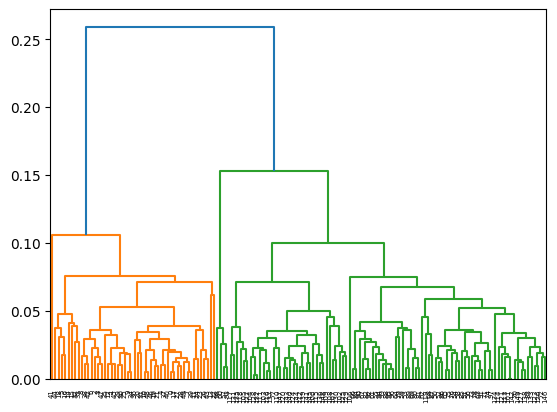

In [15]:
# デンドログラムの描画
dend = dendrogram(result)